# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [33]:
import numpy as np

# Autoreload modules when code is run.
%load_ext autoreload
%autoreload 2

# Import class
from HouseholdSpecializationModel import HouseholdSpecializationModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

In [34]:
# Create an instance of the HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()

# Create an empty list
par_list = []

# Loop over each value of alpha
for a in model.par.alpha_vec:

    # Sets alpha value in the model instance
    model.par.alpha = a

    # Loop over each value of sigma
    for s in model.par.sigma_vec:

        # Sets sigma value in the model instance
        model.par.sigma = s

        # Solves the model and appends the values to the list
        par_list.append(model.solve_discrete())

# Iteriates over 9 parameter values
for i in range(9):

    # Gets parameter values for the i-th iteration
    parameters = par_list[i]

    # Prints the ratio of FH and HM and the corresponding alpha and sigma values
    print(f' HF/HM = {parameters[2]:.3} for alpha = {parameters[4]} and sigma = {parameters[5]}')    

/Users/apple/Dropbox/projects-2023-iim-3/inauguralproject/HouseholdSpecializationModel.py:66: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/apple/Dropbox/projects-2023-iim-3/inauguralproject/HouseholdSpecializationModel.py:66: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/apple/Dropbox/projects-2023-iim-3/inauguralproject/HouseholdSpecializationModel.py:70: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


 HF/HM = 0.545 for alpha = 0.25 and sigma = 0.5
 HF/HM = 0.308 for alpha = 0.25 and sigma = 1
 HF/HM = 0.214 for alpha = 0.25 and sigma = 1.5
 HF/HM = 1.0 for alpha = 0.5 and sigma = 0.5
 HF/HM = 1.0 for alpha = 0.5 and sigma = 1
 HF/HM = 1.0 for alpha = 0.5 and sigma = 1.5
 HF/HM = 1.83 for alpha = 0.75 and sigma = 0.5
 HF/HM = 3.25 for alpha = 0.75 and sigma = 1
 HF/HM = 4.67 for alpha = 0.75 and sigma = 1.5


The results show the ratio of `HF` to `HM` for different combinations of `alpha` and `sigma` parameters. These ratios indicate the relative differences in hours worked at home by males and females for each combination of parameter values.

When alpha increases in the household utility function the weight of the wife's utility increases relative to the husband's. This implies that the husband specializes more in market work while the wife specializes more in home production. As a result, HF increases while HM decreases. 

When sigma increases the elasticity of substitution becomes greater. When alpha is low, women are less productive at home than men. The higher sigma is, the easier it is for the man to take on more house work relative to the woman. Therefore, when alpha is low and sigma increases, HF/HM decreases. When alpha is equal to 0.5, the man and woman are equally productive. Therefore, they do not have incentives to allocate housework unequally no matter how easy it is to allocate the hours (which depends on sigma). And vice versa when alpha is low.

# Question 2

Explain your code and procedure

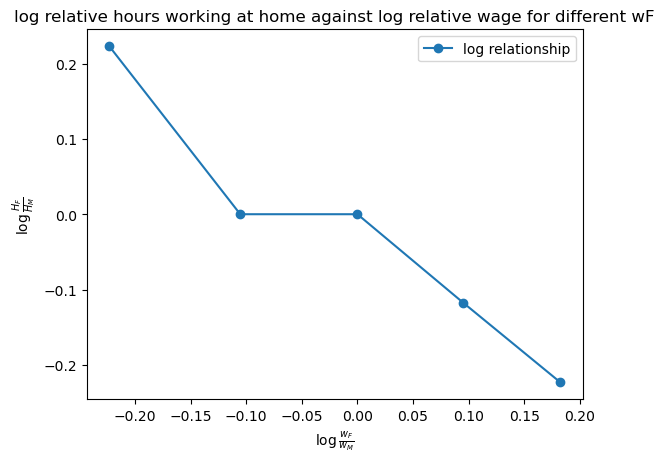

In [35]:
# Sets the value of the parameters -
model.par.alpha = 0.5
model.par.sigma = 1

# Create an empty list
par_list_2 = []

# Iterate over each value of wF
for wF in model.par.wF_vec:
    
    # Set the wage ratio of women to men 
    model.par.wF = wF

    # Solve the model 
    par_list_2.append(model.solve_discrete())

# Create an empty list
lnHFHM_list = []

# Iteriates over 5 parameter values
for i in range(5):

    # Gets parameter values for the i-th iteration
    parameters = par_list_2[i]

    # Extract the natural logarithm 
    lnHFHM = parameters[3]

    # Add the natural logarithm to ´lnHFHM_list´
    lnHFHM_list.append(lnHFHM)

# Plot log H_F/H_M against log w_F/w_M for different w_F walues
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(model.par.lnwFwH_vec, lnHFHM_list, label='log relationship', marker = "o")

# Create labels in the plot 
ax.set_title('log relative hours working at home against log relative wage for different wF')
ax.set_xlabel(rf'$\log \frac{{w_F}}{{w_M}}$')
ax.set_ylabel(rf'$\log \frac{{H_F}}{{H_M}}$')
ax.legend(loc='upper right');

The plot shows the relationship between the log of the relative wage for women compared to men (x-axis) and the log of the relative hours worked from home by women compared to men (y-axis).

The plot indicates a negative relationship between the log of the relative wage for women and the log of the relative hours worked at home by women. This suggests that as the relative wage for women increases, the relative hours worked at home by women decreases. This result is expected as a relative higher wage for women will create an incentive for women to work rather than working in the household. 

# Question 3

Explain your code and procedure

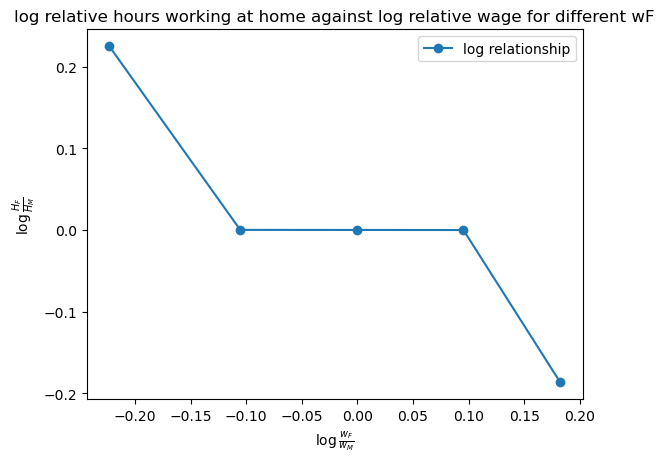

In [36]:
# # Sets the value of the parameters
model.par.alpha = 0.5
model.par.sigma = 1

# Create an empty list
lnHFHM_Q3 = []

# Iteriates over 5 parameter values
for i in range(5):

    # Gets parameter values for the i-th iteration
    model.par.wF = model.par.wF_vec[i] 

    # Add the natural logarithm to ´lnHFHM_Q3´
    lnHFHM_Q3.append(model.solve())

# Plot log H_F/H_M against log w_F/w_M for different w_F walues
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(model.par.lnwFwH_vec, lnHFHM_Q3,  label='log relationship', marker = "o")

# Create labels in the plot 
ax.set_title('log relative hours working at home against log relative wage for different wF')
ax.set_xlabel(rf'$\log \frac{{w_F}}{{w_M}}$')
ax.set_ylabel(rf'$\log \frac{{H_F}}{{H_M}}$')
ax.legend(loc='upper right'); # Activate legend (uses the labels in ax.plot())

The plot shows now the relationship between the log of the relative wage for women compared to men (x-axis) and the log of the relative hours worked from home by women compared to men (y-axis) when the choice set is continious.

The plot indicates a negative relationship between the log of the relative wage for women and the log of the relative hours worked at home by women. This suggests that as the relative wage for women increases, the relative hours worked at home by women decreases. This result is expected as a relative higher wage for women will create an incentive for women to work rather than working in the household. 

# Question 4

In [37]:
# code
res = model.estimate()
print(f'Optimal alpha = {res[0]}, optimal sigma = {res[1]}')



/Users/apple/Dropbox/projects-2023-iim-3/inauguralproject/HouseholdSpecializationModel.py:66: RuntimeWarning: divide by zero encountered in power
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


Optimal alpha = 0.5499999999999998, optimal sigma = 0.95


# Question 5

In [ ]:
# code

ADD CONCISE CONLUSION.